In [21]:
import matplotlib.pyplot as plt
from PIL.Image import Image as PilImage
import textwrap, os

import json
idx2label = []
cls2label = {}
with open("./imagenet_class_index.json", "r") as read_file:
    class_idx = json.load(read_file)
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]
    cls2label = {class_idx[str(k)][0]: class_idx[str(k)][1] for k in range(len(class_idx))}

def display_images(
    images: [PilImage], 
    columns=7, width=20, height=5, max_images=50, 
    label_wrap_length=50, label_font_size=8):

    if not images:
        print("No images to display.")
        return 

    if len(images) > max_images:
        print(f"Showing {max_images} images of {len(images)}:")
        images=images[0:max_images]

    height = max(height, int(len(images)/columns) * height)
    plt.figure(figsize=(width, height))
    for i, image in enumerate(images):

        plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        plt.imshow(image)

        if hasattr(image, 'filename'):
#             title=image.filename
#             if title.endswith("/"): title = title[0:-1]
#             title=os.path.basename(title)
#             title=textwrap.wrap(title, label_wrap_length)
#             title="\n".join(title)
#             title += " " + idx2label[i]
            title = f"\n Channel {str(i)} - {idx2label[i]}"
            plt.title(title, fontsize=label_font_size); 

In [17]:
from PIL import Image
import glob
from natsort import natsorted
image_list = []
for filename in natsorted(glob.glob('outputs/realization-fc-0531/*.png')): #assuming gif
    im=Image.open(filename)
    image_list.append(im)

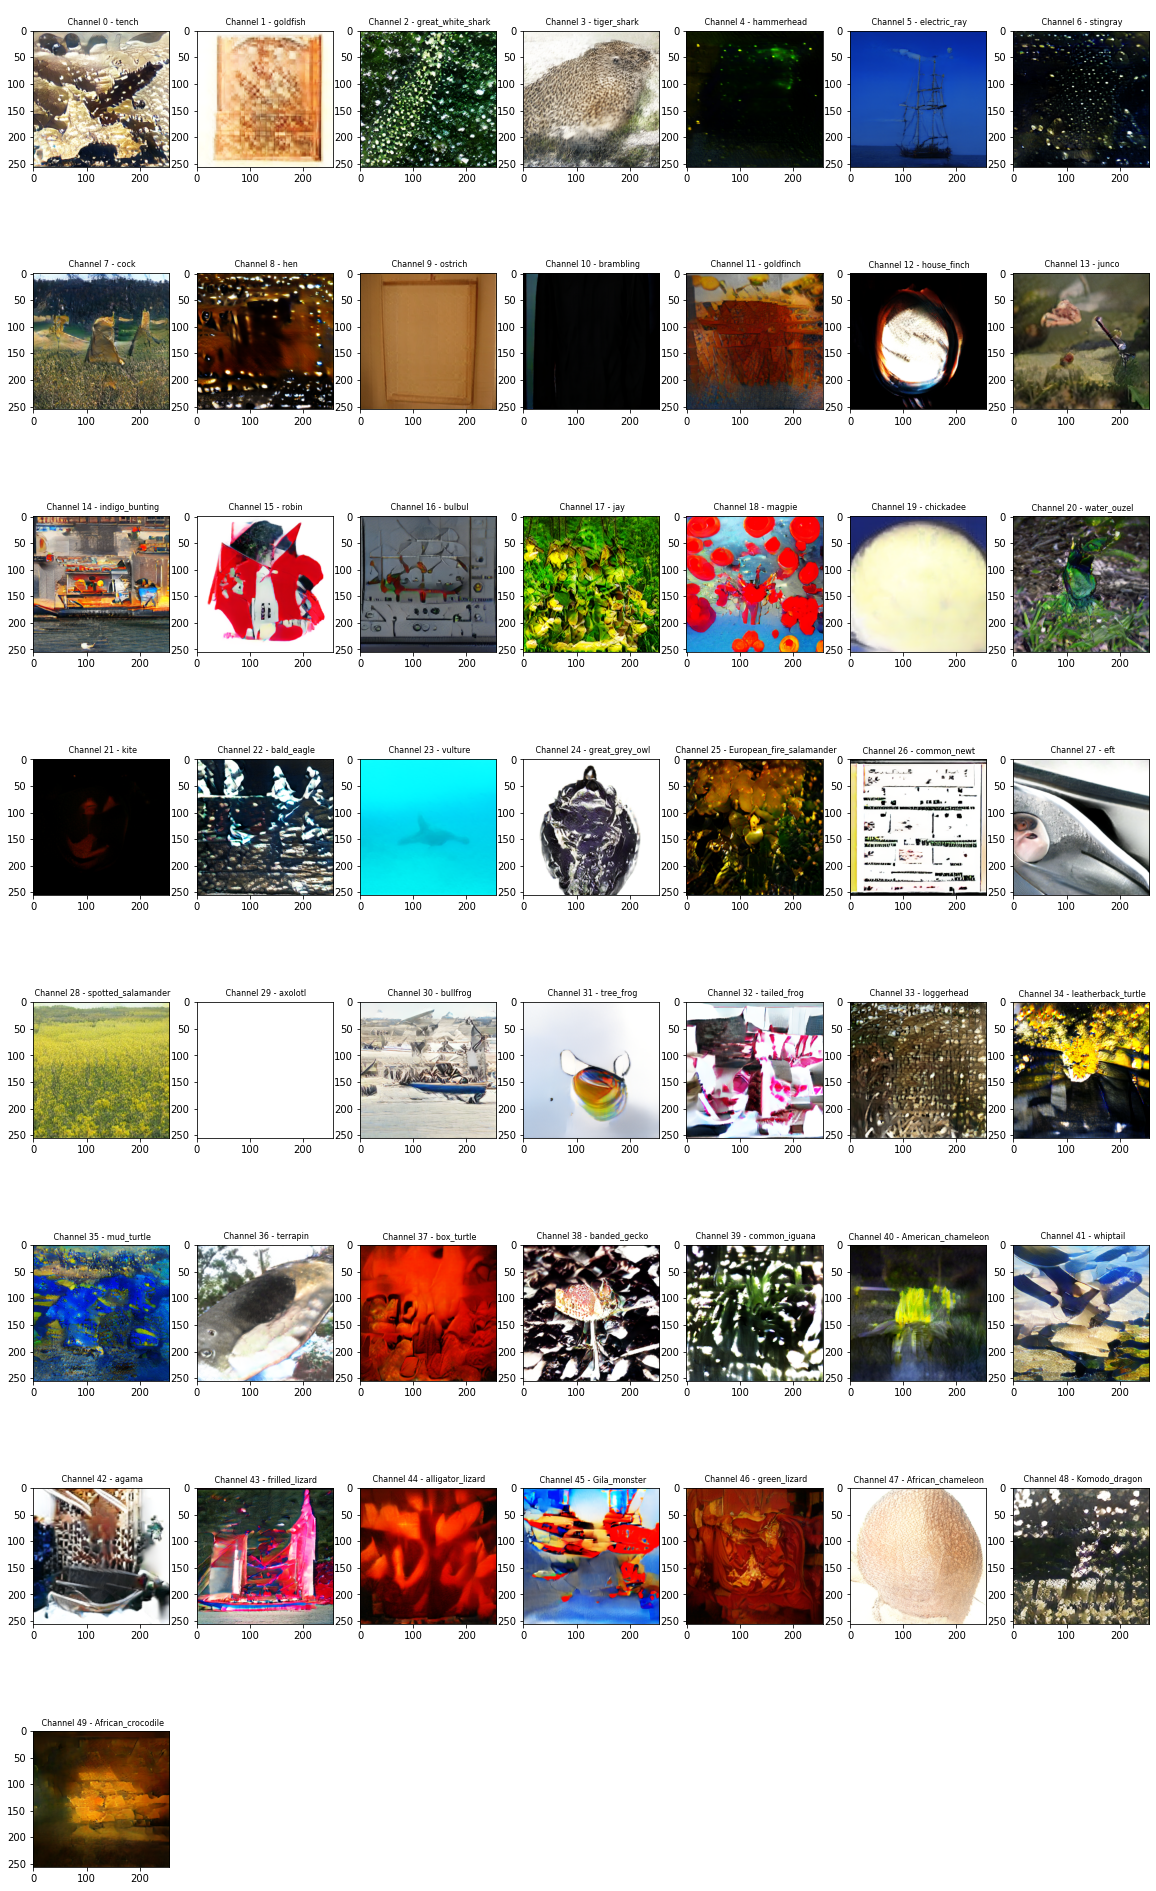

In [22]:
display_images(image_list)